# GITHUB

https://github.com/Vladimirjon/MetodosNumericos_PasquelJohann

# CONJUNTO DE EJERCICIOS 

### 1. Sea $f(x) = -x^3 - \cos(x)$ y $p_0 = -1$. Use el método de Newton y de la Secante para encontrar $p_2$.


In [3]:
from scipy.optimize import newton
import numpy as np

def f(x):
    return - x ** 3 - np.cos(x)

def fder(x):
    return -3 * x**2 + np.sin(x)

p0 = -1

In [4]:
n1 = newton(f, p0, fprime=fder)
print(f'La raiz aproximada es: {n1} | Método de Newton')


La raiz aproximada es: -0.8654740331016144 | Método de Newton


In [5]:
s1 = newton(f, p0)

print(f'La raiz aproximada es: {s1} | Método de la Secante')

La raiz aproximada es: -0.8654740331016144 | Método de la Secante


**¿Se podría usar $p_0 = 0$?**

In [6]:
p0 = 0

Primero probemos con el método de Newton:

In [7]:
try:
    n2 = newton(f, p0, fprime=fder)
except RuntimeError as e:
    print('ERROR:', e)

ERROR: Derivative was zero. Failed to converge after 1 iterations, value is 0.0.


> El código retorna un error porque la derivada evaluada en el punto inicial $p_0$ es cero, por lo que el método no puede continuar.
>
> $p_1 = p_0 - \frac{f(p_0)}{f'(p_0)}$
>
> $p_1 = 0 - \frac{f(0)}{-3(0)^2 + \sin(0)}$ -> Error: División por cero.

A continuación se puede observar el gráfico de la función y de la recta tangente (derevida) evaluada en ese punto.

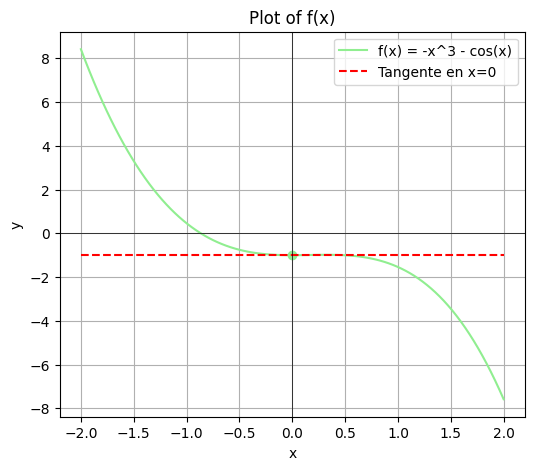

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
y = f(x)

f0 = f(0)
fder0 = fder(0)
tangent_line = fder0 * (x - 0) + f0

plt.figure(figsize=(6, 5))
plt.plot(x, y, label='f(x) = -x^3 - cos(x)', color='lightgreen')
plt.plot(x, tangent_line, label='Tangente en x=0', color='red', linestyle='--')
plt.axhline(0, color='black', lw=0.5)  # x-axis
plt.axvline(0, color='black', lw=0.5)  # y-axis
plt.scatter(0, f(0), color='lightgreen') 
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Probemos ahora con el método de la secante:

In [9]:
s2 = newton(f, p0) 

print(f'La raiz aproximada es: {s2} | Método de la Secante')

La raiz aproximada es: -4.998000183473029e-09 | Método de la Secante


El algoritmo retorna un resultado que es incorrecto. Cabe destacar que en este caso, el método calcula el segundo valor inicial, que podría ser un factor para que retorne la respuesta incorrecta.

Probemos esta vez asignando los dos valores iniciales:

In [10]:
try:
    s2_1 = newton(f, p0, x1=0.1)
except RuntimeError as e:
    print('ERROR:', e)

ERROR: Failed to converge after 50 iterations, value is -0.0035371633005660988.


> En cambio, aquí se produce un error de no convergencia.

In [11]:
s2_2 = newton(f, p0, x1 = 2) 

print(f'La raiz aproximada es: {s2_2} | Método de la Secante')

La raiz aproximada es: -0.8654740331017148 | Método de la Secante


Para este par de valores iniciales, arroja una respuesta correcta.

### 2. Encuentre soluciones precisas dentro de $10^{-4}$ para los siguientes problemas:

Definimos la tolerancia para todos los literales.

In [12]:
TOL = 1e-04

#### a. $x^3 - 2x^2 - 5 = 0$, en el intervalo $[1, 4]$

In [13]:
def f(x):
    return x ** 3 - 2 * x ** 2 - 5

def fder(x):
    return 3 * x ** 2 - 4 * x

p0 = 2

In [14]:
n2a, result = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations - 1} = {n2a:.5f} | Método de Newton')

La raiz aproximada es: p4 = 2.69065 | Método de Newton


#### b. $x^3 + 3x^2 - 1 = 0$, en el intervalo $[-3, -2]$

In [15]:
def f(x):
    return x ** 3 + 3 * x ** 2 - 1

def fder(x):
    return 3 * x ** 2 + 6 * x

p0 = -3

In [16]:
n2b, result = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations - 1} = {n2b:.5f} | Método de Newton')

La raiz aproximada es: p2 = -2.87939 | Método de Newton


#### c. $x - \cos(x) = 0$, en el intervalo $[0, \frac{\pi}{2}]$

In [17]:
def f(x):
    return x - np.cos(x)

def fder(x):
    return 1 + np.sin(x)

p0 = 0

In [18]:
n2c, result = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations - 1} = {n2c:.5f} | Método de Newton')

La raiz aproximada es: p3 = 0.73909 | Método de Newton


#### d. $x - 0.8 - 0.2 \sin(x) = 0$, en el intervalo $[0, \frac{\pi}{2}]$

In [19]:
def f(x):
    return x - 0.8 - 0.2 * np.sin(x)

def fder(x):
    return 1 - 0.2 * np.cos(x)

p0 = 0

In [20]:
n2d, result = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations - 1} = {n2d:.5f} | Método de Newton')

La raiz aproximada es: p3 = 0.96433 | Método de Newton


### 3. Encuentre las soluciones dentro de $10^{-5}$ para los siguientes problemas utilizando los métodos de Newton y de la Secante:

Inicialmente, definimos la toleracia.

In [21]:
TOL = 1e-05

#### a. $3x - e^x = 0$ para $1 \leq x \leq 2$

In [22]:
def f(x):
    return 3 * x - np.exp(x)

def fder(x):
    return 3 - np.exp(x)

p0 = 1.5

In [23]:
n3a, result = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations -1} = {n3a:.8f} | Método de Newton')

La raiz aproximada es: p2 = 1.51213455 | Método de Newton


In [24]:
p0 = 1
p1 = 2

s3a, result = newton(f, p0, x1=p1, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations} = {s3a:.8f} | Método de la Secante')

La raiz aproximada es: p9 = 1.51213455 | Método de la Secante


#### b. $2x + 3\cos(x) - e^x = 0$ para $1 \leq x \leq 2$

In [25]:
def f(x):
    return 2 * x + 3 * np.cos(x) - np.exp(x)

def fder(x):
    return 2 - 3 * np.sin(x) - np.exp(x)

p0 = 1.5

In [26]:
n3b, result = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations -1} = {n3b:.8f} | Método de Newton')

La raiz aproximada es: p3 = 1.23971470 | Método de Newton


In [27]:
p0 = 1
p1 = 2

s3b, result = newton(f, p0, x1=p1, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{result.iterations} = {s3b:.8f} | Método de la Secante')

La raiz aproximada es: p6 = 1.23971470 | Método de la Secante


### 4. El polinomio de cuarto grado

$f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$

**tiene dos ceros reales, uno en $[-1,0]$ y el otro en $[0,1]$. Intente aproximar estos ceros dentro de $10^{-6}$ con:**

In [28]:
TOL = 1e-06

def f(x):
    return 230 * x ** 4 + 18 * x ** 3 + 9 * x ** 2 - 221 * x - 9

#### a. El método de la secante (use los extremos como las estimaciones iniciales).


In [29]:
p0 = -1
p1 = 0

s4_1 = newton(f, p0, x1=p1, tol=TOL)

print(f'La raiz aproximada es: {s4_1:.8f} | Método de la Secante')

La raiz aproximada es: -0.04065929 | Método de la Secante


In [30]:
p0 = 0
p1 = 1

s4_2 = newton(f, p0, x1=p1, tol=TOL)

print(f'La raiz aproximada es: {s4_2:.8f} | Método de la Secante')

La raiz aproximada es: -0.04065929 | Método de la Secante


Debido a la naturaleza del algoritmo, con ambos intevalos específicos se llega a la misma respuesta y no a las distintas.

In [31]:
p0 = 0.01
p1 = 1

s4_2_2 = newton(f, p0, x1=p1, tol=TOL)

print(f'La raiz aproximada es: {s4_2_2:.8f} | Método de la Secante')

La raiz aproximada es: 0.96239842 | Método de la Secante


Con una pequeña modificación al intervalo $p_0 = 0.01$, se consigue la otra raíz.

#### b. El método de Newton (use el punto medio como estimación inicial).

In [32]:
def fder(x):
    return 920 * x ** 3 + 54 * x ** 2 + 18 * x - 221

In [33]:
p0 = -0.5

n4_1 = newton(f, p0, fprime=fder)

print(f'La raiz aproximada es: {n4_1:.8f} | Método de Newton')

La raiz aproximada es: -0.04065929 | Método de Newton


In [34]:
p0 = 0.5

n4_2 = newton(f, p0, fprime=fder)

print(f'La raiz aproximada es: {n4_2:.8f} | Método de Newton')

La raiz aproximada es: -0.04065929 | Método de Newton


> Es correcto que hay soluciones diferentes en cada intervalo. Pero, al utilizar los valores medios podemos observar que el método de Newton converge hacia la misma respuesta.
>
> **Esto sucede porque para ambos valores iniciales, se encuentran en una región donde la función es decreciente y continua, sus tangentes apuntan hacia el mismo valor de convergencia en el eje x. Así, independientemente del punto inicial en este intervalo, el método converge a la misma raíz.**

Podemos notar lo antes mencionado en el gráfico:

Pero antes calculamos el mímino relativo

In [35]:
min_rel = newton(fder, 1)
print(min_rel)

0.5925163670059391


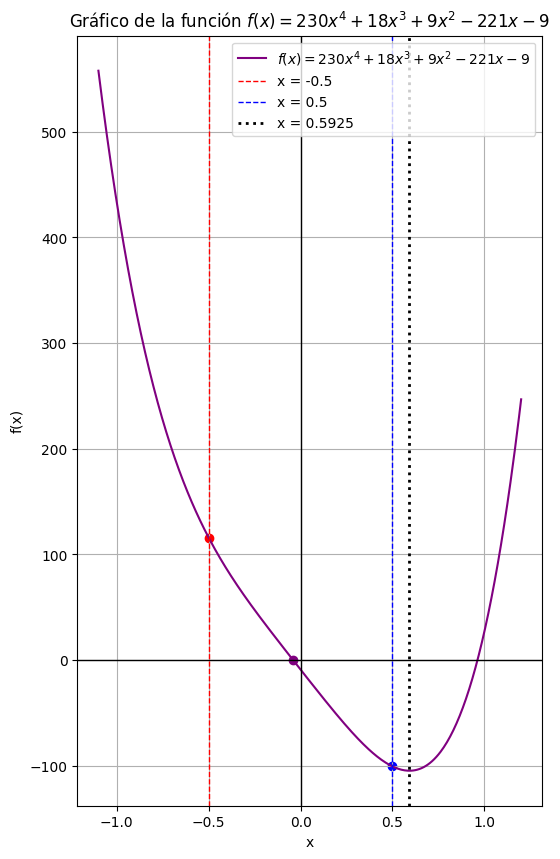

In [36]:
x = np.linspace(-1.1, 1.2, 400)
y = f(x)

p0_1 = -0.5
p0_2 = 0.5

plt.figure(figsize=(6, 10))
plt.plot(x, y, label=r"$f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$", color='purple')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1) 
plt.axvline(p0_1, color='red', linestyle='--', linewidth=1, label="x = -0.5")
plt.axvline(p0_2, color='blue', linestyle='--', linewidth=1, label="x = 0.5")
plt.axvline(min_rel, color='black', linestyle=':', linewidth=2, label="x = 0.5925")

plt.scatter(p0_1, f(p0_1), color='red')
plt.scatter(p0_2, f(p0_2), color='blue')
plt.scatter(n4_1, 0, color='purple')


plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico de la función $f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$")
plt.legend()
plt.grid(True)
plt.show()

### 5. La función $f(x) = \tan(\pi x) - 6$ tiene un cero en $\frac{1}{\pi} \arctan(6) \approx 0.447431543$. Sea $p_0 = 0$ y $p_1 = 0.48$. Utilice 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?

In [37]:
def f(x):
    return np.tan(np.pi * x) - 6

p0 = 0
p1 = 0.48

MAXITER = 10

#### a. Método de Bisección

In [38]:
from scipy.optimize import bisect

try:
    b5, result = bisect(f, p0, p1, maxiter=MAXITER, full_output=True)
except RuntimeError as e:
    print('ERROR:', e)

ERROR: Failed to converge after 10 iterations.


Con el método de la bisección converge a las 38 iteraciones.

In [39]:
b5_1, result = bisect(f, p0, p1, maxiter=100, full_output=True)

print(f'La raiz aproximada es: p{result.iterations} = {b5_1:.8f} | Método de la Bisección')

La raiz aproximada es: p38 = 0.44743154 | Método de la Bisección


#### b. Método de Newton

In [40]:
p0 = 0.24

def fder(x):
    return np.pi * (1 / np.cos(np.pi * x))**2

n5, result = newton(f, p0, fprime=fder, maxiter=MAXITER, full_output=True)
print(f'La raiz aproximada es: p{result.iterations - 1} = {n5:.8f} | Método de la Newton')

La raiz aproximada es: p7 = 5.44743154 | Método de la Newton


#### c. Método de la Secante

In [41]:
p0 = 0
p1 = 0.48
try:
    s5, result = newton(f, p0, x1=p1, maxiter=MAXITER, full_output=True)
except RuntimeError as e:
    print('ERROR:', e)
# print(f'La raiz aproximada es: p{result.iterations } = {s5:.8f} | Método de la Secante')

ERROR: Failed to converge after 10 iterations, value is -3694.358600967476.


### 6. La función descrita por $𝑓(𝑥) = ln(𝑥^2 + 1) − e^{0.4𝑥} \cos(\pi𝑥)$ tiene un número infinito de ceros.

In [42]:
def f(x):
    return np.log(x ** 2 + 1) - np.exp(0.4  * x) * np.cos(np.pi * x)

def fder(x):
    return ((2 * x) / x ** 2 + 1) - 0.4 * np.exp(0.4 * x) * np.cos(np.pi * x) + np.pi * np.exp(0.4 * x) * np.sin(np.pi * x)

TOL = 1e-06

#### a. Determine, dentro de 10−6, el único cero negativo.

In [43]:
p0 = -0.5

n6a, r = newton(f, p0, fprime=fder, tol=TOL, full_output=True)

print(f'La raiz aproximada es: p{r.iterations - 1} = {n6a:.8f} | Método de la Newton')

La raiz aproximada es: p14 = -0.43414348 | Método de la Newton


#### b. Determine, dentro de 10−6, los cuatro ceros positivos más pequeños.

In [44]:
ceros = []
p0 = 0.5
for i in range(4):
    ans, r = newton(f, p0, fprime=fder, tol=TOL, full_output=True)
    ceros.append((ans, r.iterations - 1))
    p0 += 1

print('Método de Newton - Raices')
for root, iter in ceros:
    print(f'La raiz aproximada es: p{iter} = {root:.8f}')

Método de Newton - Raices
La raiz aproximada es: p16 = 0.45065733
La raiz aproximada es: p17 = 1.74473790
La raiz aproximada es: p8 = 2.23831990
La raiz aproximada es: p6 = 3.70904123



#### c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de 𝑓. 

***Sugerencia: Dibuje una gráfica aproximada de 𝑓.***

#### d. Use la parte c) para determinar, dentro de 10−6, el vigesimoquinto cero positivo más pequeño de 𝑓. 

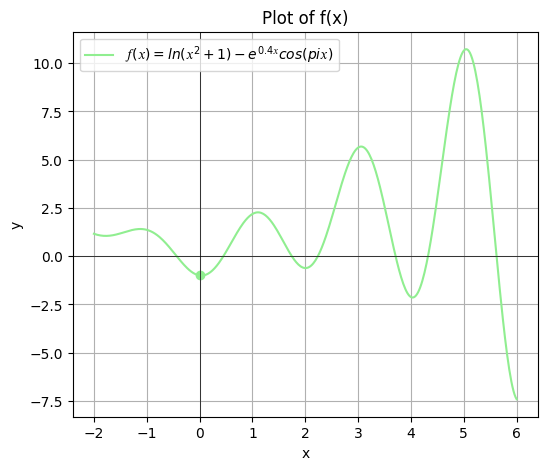

In [45]:
x = np.linspace(-2, 6, 400)
y = f(x)


plt.figure(figsize=(6, 5))
plt.plot(x, y, label='$𝑓(𝑥) = ln(𝑥^2 + 1) − e^{0.4𝑥} cos(pi𝑥)$', color='lightgreen')
#plt.plot(x, tangent_line, label='Tangente en x=0', color='red', linestyle='--')
plt.axhline(0, color='black', lw=0.5)  # x-axis
plt.axvline(0, color='black', lw=0.5)  # y-axis
plt.scatter(0, f(0), color='lightgreen') 
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [46]:
roots = []
for n in range(1, 11):
    p0 = n - 0.3
    ans = newton(f, p0, fprime=fder, tol=TOL)
    roots.append((n, ans))

for n, root in roots:
    print(f'Raiz aproximada: p = {root:.8f} con n = {n}')

Raiz aproximada: p = 0.45065775 con n = 1
Raiz aproximada: p = 1.74473820 con n = 2
Raiz aproximada: p = 2.23831991 con n = 3
Raiz aproximada: p = 3.70904128 con n = 4
Raiz aproximada: p = 4.32264900 con n = 5
Raiz aproximada: p = 5.61993532 con n = 6
Raiz aproximada: p = 6.40693361 con n = 7
Raiz aproximada: p = 7.56321053 con n = 8
Raiz aproximada: p = 8.45348097 con n = 9
Raiz aproximada: p = 9.53183354 con n = 10


### 7. La función $f(x) = 𝑥^{1/3}$ tiene raíz en $x = 0$. Usando el punto de inicio de $x = 1$ y $p_0 = 5$, $p_1 = 0.5$ para el método de secante, compare los resultados de los métodos de la secante y de Newton.

In [49]:
def f(x):
    return x**(1/3)

def f_prime(x):
    return 1 / (3 * (x**(2/3)))

def secant_method(f, p0, p1, tol=1e-6, max_iter=100):
    iter_count = 0
    while abs(p1 - p0) > tol and iter_count < max_iter:
        f_p0, f_p1 = f(p0), f(p1)
        # Fórmula de la secante
        p2 = p1 - f_p1 * (p1 - p0) / (f_p1 - f_p0)
        p0, p1 = p1, p2
        iter_count += 1
    return p1, iter_count

def newton_method(f, f_prime, x0, tol=1e-6, max_iter=100):
    iter_count = 0
    while abs(f(x0)) > tol and iter_count < max_iter:
        # Fórmula de Newton
        x1 = x0 - f(x0) / f_prime(x0)
        x0 = x1
        iter_count += 1
    return x0, iter_count

# Parámetros iniciales
p0, p1 = 5, 0.5  # Para el método de la secante
x0 = 1           # Para el método de Newton

# Tolerancia y número máximo de iteraciones
tol = 1e-6
max_iter = 100

secant_result, secant_iters = secant_method(f, p0, p1, tol, max_iter)
newton_result, newton_iters = newton_method(f, f_prime, x0, tol, max_iter)

print("Método de la Secante:")
print(f"Raíz aproximada: {secant_result}, Iteraciones: {secant_iters}")

print("\nMétodo de Newton:")
print(f"Raíz aproximada: {newton_result}, Iteraciones: {newton_iters}")


Método de la Secante:
Raíz aproximada: (1.2916757952825e+16+7.467594290408387e+16j), Iteraciones: 100

Método de Newton:
Raíz aproximada: (1.2676506002278626e+30-6259028816971895j), Iteraciones: 100


En este caso, el método de Newton converge más rápidamente hacia la raíz $x=0$ en comparación con el método de la secante, **debido a que utiliza la derivada**.

Lo que permite una aproximación más precisa en cada iteración. Newton alcanza la solución en menos iteraciones con el punto inicial $X_0=1$ meintras que la secante con puntos iniciales $p_0 = 5$ y $p_1 = 0.5$ requiere más pasos debido a la mayor distancia inicial respecto a la raíz.